In [417]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [418]:
# This class contains the data (a pandas df) as an attribute 
class df_data_source():
    def __init__(self,source,source_type):
        self.source_type = source_type
        self.source = source
        if(self.source_type == 'url'):
            self.get_data_by_url(source)
        elif(self.source_type == 'path'):
            self.get_data_by_path(source)
        elif(self.source_type == 'pass'):
            self.get_data(source)
    # Method to split data train/test
    # This method also reshapes the data in order to be used by the model
    def split_data(self,test_size_):
        self.test_size_ = test_size_
        self.price_subset = self.data_source.iloc[:, -1].values
        self.non_price_subset = self.data_source.iloc[:, :-1].values
        self.price_subset_train, self.price_subset_test,self.data_subset_train, self.data_subset_test = train_test_split(self.price_subset, self.non_price_subset, test_size=self.test_size_, shuffle=True, random_state=0, train_size=0.3)
        self.price_subset_train = self.price_subset_train.reshape(-1, 1)
        self.price_subset_test = self.price_subset_train.reshape(-1, 1)
    # Method to delete the duplicates 
    # A post is a duplicate if it shares the same post_id/post_link
    def delete_duplicates(self):
        self.data_source = df.data_source.drop_duplicates(subset="post_link")
    def delete_nan(self,column_wnan):
        self.column_wnan = column_wnan
        self.data_source = self.data_source[self.data_source[column_wnan].notna()]
        #sns.heatmap(self.data_source.corr())
    def delete_outliers(self):
        self.q1 = self.data_source.quantile(0.25)
        self.q3 = self.data_source.quantile(0.75)
        self.iqr = self.q3 - self.q1
        self.data_source = self.data_source[~((self.data_source < (self.q1 - 1.5 * self.iqr)) |self.data_source > (self.q3 + 1.5 * self.iqr)).any(axis=1)]
    def drop_column(self,column_name):
        self.column_name = column_name
        self.data_source.drop(self.column_name, axis=1, inplace=True)
    # The dataframe is pulled from github using an url
    def get_data_by_url(self,data_source_url):
        self.data_source_url = data_source_url 
        self.data_source = pd.read_csv(self.data_source_url)
    # The dataframe is pulled from a specific path
    def get_data_by_path(self,data_source_path):
        self.data_source_path = data_source_path
        self.data_source = pd.read_csv(self.data_source_path)
    # The dataframe is assigned (=)
    def get_data(self,data_source):
        self.data_source = data_source

In [419]:
class plotting():
    def __init__(self,data):
        self.data = data
    def plot_distr(self,x_column):
        self.x_column = x_column
        self.x_data = self.data[x_column]
        sns.displot(self.x_data)
    def plot_corr(self):
        sns.heatmap(self.data.corr())
    def plot_histo(self):
        self.y_data = self.data['Price']
        self.variables = ['estrato','property_type','neighborhood','Area','bedrooms','bathrooms','garages']
        for self.i in self.variables:
            self.x_column = self.data[self.i]
            sns.jointplot(x=self.x_column, y=self.y_data , data=self.data)

In [459]:
class oh_encoder(OneHotEncoder):
    def __init__(self,data):
        super(OneHotEncoder, self).__init__()
        self.data = data
        self.data.drop (['post_title'], 1, inplace=True)
        self.data.drop(['post_link'], 1, inplace=True)
        self.data.drop(['city'], 1, inplace=True)
        self.handle_unknown = "ignore"
        self.categories = 'auto'
        self.sparse = False
        self.dtype = float
        self.drop = None
    def encode(self):
        self.columns_cat = self.data.select_dtypes(include=["object"]).columns
        self.encoded_data = self.fit_transform(self.data[self.columns_cat])
        self.encoded_data = pd.DataFrame(self.encoded_data, columns = self.get_encoded_columns())
        self.oh_data = self.encoded_data.join(self.data)
        self.oh_data = self.delete_non_encoded_columns(self.oh_data)
        return self.oh_data
    def get_encoded_columns(self):
        self.columns_cats_encoded = []
        for column in self.columns_cat :
            self.columns_cats_encoded += [f"{column[0]}_{cat}" for cat in list(df.data_source[column].unique())]
        return self.columns_cats_encoded
    def delete_non_encoded_columns(self,data_encoded):
        self.data_encoded = data_encoded
        for column in self.columns_cat :
            self.data_encoded.drop([column], 1, inplace=True)
        return self.data_encoded

In [421]:
df = df_data_source('https://raw.githubusercontent.com/sets018/Ocelot/main/data_extraction/df_posts_housing_clean.csv','url')

In [401]:
df.data_source.head()

,index,post_id,post_title,bussiness_type,condition,estrato,property_type,city,neighborhood,Area,bedrooms,bathrooms,garages,post_link,Price
0,1,7172619,Usado$250.000.000 COP224m² • 3ha. • 1ba.villac...,Venta,Usado,1,Casa,barranquilla,Villa Sevilla,224,3,1,0,https://www.fincaraiz.com.co/inmueble/casa-en-...,250000000
1,2,7127871,UsadoInmobiliaria$240.000.000 COP88m² • 3ha. •...,Venta,Usado,1,Apartamento,barranquilla,El Prado,88,3,2,1,https://www.fincaraiz.com.co/inmueble/apartame...,240000000
2,3,7187797,Usado$70.000.000 COP104m² • 3ha. • 1ba.bosque ...,Venta,Usado,1,Casa,barranquilla,El Bosque,104,3,1,0,https://www.fincaraiz.com.co/inmueble/casa-en-...,70000000
3,4,7037686,UsadoInmobiliaria$1.200.000.000 COP600m² • 3ba...,Venta,Usado,1,Casa,barranquilla,Altos del Prado,600,3,5,0,https://www.fincaraiz.com.co/inmueble/casa-en-...,1200000000
4,5,7162861,UsadoInmobiliaria$350.000.000 COP4m² • 3ha. • ...,Venta,Usado,1,Casa,barranquilla,Paraíso,4,3,3,1,https://www.fincaraiz.com.co/inmueble/casa-en-...,350000000


In [402]:
print("# Rows ", df.data_source.shape[0],"# Columns ", df.data_source.shape[1])
print("\n Columns \n", df.data_source.columns.tolist())
print("\n Nulls ",df.data_source.isnull().sum().values.sum())
print("\n Unique values \n", df.data_source.nunique())
print(df.data_source.shape)

# Rows  9384 # Columns  15

 Columns 
 ['index', 'post_id', 'post_title', 'bussiness_type', 'condition', 'estrato', 'property_type', 'city', 'neighborhood', 'Area', 'bedrooms', 'bathrooms', 'garages', 'post_link', 'Price']

 Nulls  22

 Unique values 
 index             3398
post_id           6388
post_title        6432
bussiness_type       1
condition            3
estrato              5
property_type       41
city                 4
neighborhood       155
Area               545
bedrooms            20
bathrooms           11
garages             11
post_link         6388
Price              797
dtype: int64
(9384, 15)


In [422]:
df.drop_column('bussiness_type')

In [423]:
df.delete_duplicates()

In [405]:
print("# Rows ", df.data_source.shape[0],"# Columns ", df.data_source.shape[1])
print("\n Columns \n", df.data_source.columns.tolist())
print("\n Nulls ",df.data_source.isnull().sum().values.sum())
print("\n Unique values \n", df.data_source.nunique())
print(df.data_source.shape)

# Rows  6388 # Columns  14

 Columns 
 ['index', 'post_id', 'post_title', 'condition', 'estrato', 'property_type', 'city', 'neighborhood', 'Area', 'bedrooms', 'bathrooms', 'garages', 'post_link', 'Price']

 Nulls  15

 Unique values 
 index            3072
post_id          6388
post_title       6337
condition           3
estrato             5
property_type      41
city                4
neighborhood      155
Area              545
bedrooms           20
bathrooms          11
garages            11
post_link        6388
Price             736
dtype: int64
(6388, 14)


In [374]:
df.data_source["condition"].unique()

array(['Usado', 'Inmobiliaria', 'Proyecto', nan], dtype=object)

In [375]:
df.data_source["city"].unique()

array(['barranquilla', 'el-colegio', 'cali', 'atlantico'], dtype=object)

In [376]:
df.data_source.loc[df.data_source["city"] == 'el-colegio']['post_link'].values

array(['https://www.fincaraiz.com.co/inmueble/casa-en-venta/barranquilla/el-colegio/7154494'],
      dtype=object)

In [377]:
df.data_source.loc[df.data_source["city"] == 'cali']['post_link'].values

array(['https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7118906',
       'https://www.fincaraiz.com.co/inmueble/casa-en-venta/barranquilla/cali/6189163',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/5565798',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7157998',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7034633',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7131381',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7193976',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7096418',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7187387',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/cali/7182231'],
      dtype=object)

In [378]:
df.data_source.loc[df.data_source["city"] == 'atlantico']['post_link'].values

array(['https://www.fincaraiz.com.co/inmueble/casa-en-venta/barranquilla/atlantico/4064706',
       'https://www.fincaraiz.com.co/inmueble/apartamento-en-venta/barranquilla/atlantico/7129434'],
      dtype=object)

In [424]:
df.data_source.drop(df.data_source[df.data_source["city"] == 'atlantico'].index, inplace = True)

In [425]:
df.data_source.drop(df.data_source[df.data_source["city"] == 'cali'].index, inplace = True)

In [426]:
df.data_source.drop(df.data_source[df.data_source["city"] == 'el-colegio'].index, inplace = True)

In [261]:
df.data_source["city"].unique()

array(['barranquilla'], dtype=object)

In [262]:
df.data_source["property_type"].unique()

array(['Casa', 'Apartamento', 'Apartaestudio', 'Barloa', 'BONAVENTOPor',
       'CARIBE', 'Álamos', 'Casas', 'PALMAR', 'Torres', 'ALTOS',
       'EDIFICIO', 'PUERTO', 'NUVOLI', 'SilbadorPor', 'PICAFLORPor',
       'FLAMINGOPor', 'PUERTA', 'AMATISTAPor', 'Altavista', 'ZafiroPor',
       'CATLEYA', 'Ambar', 'NEW', 'BRISAS', 'BOLONIAPor', 'Madeira',
       'NAPOLIPor', 'PARK', 'ACUARELA', 'Baruc', 'CONJUNTO', 'TORRES',
       'SOLARIOPor', 'RIVER', 'MONTERIVERAPor', 'VALLARTAPor', 'Mint',
       'SIMPLICITYPor', 'TOWER', 'Edificio'], dtype=object)

In [263]:
df.data_source.loc[df.data_source["property_type"] == 'Barloa']['post_link'].values

array(['https://www.fincaraiz.com.co/proyecto-de-vivienda/barloa--trivento/caribe-verde/barranquilla/6857997'],
      dtype=object)

In [264]:
df.data_source.loc[df.data_source["property_type"] == 'BONAVENTOPor']['post_link'].values

array(['https://www.fincaraiz.com.co/proyecto-de-vivienda/bonavento/caribe-verde/barranquilla/6633207'],
      dtype=object)

In [265]:
df.data_source.loc[df.data_source["property_type"] ==  'CARIBE']['post_link'].values

array(['https://www.fincaraiz.com.co/proyecto-de-vivienda/caribe-plaza-2/caribe-verde/barranquilla/2084144'],
      dtype=object)

In [427]:
for i in df.data_source["property_type"].unique():
    n_posts = len(df.data_source.loc[df.data_source["property_type"] == i]['post_link'])
    if (n_posts < 10):
        df.data_source.drop(df.data_source[df.data_source["property_type"] == i].index, inplace = True) 

In [410]:
df.data_source["property_type"].unique()

array(['Casa', 'Apartamento', 'Apartaestudio'], dtype=object)

In [428]:
df.data_source.loc[df.data_source["property_type"] == 'Apartaestudio', "property_type"] = 'Apartamento'

In [412]:
df.data_source["property_type"].unique()

array(['Casa', 'Apartamento'], dtype=object)

In [413]:
print("# Rows ", df.data_source.shape[0],"# Columns ", df.data_source.shape[1])
print("\n Columns \n", df.data_source.columns.tolist())
print("\n Nullls ",df.data_source.isnull().sum().values.sum())
print("\n Unique values \n", df.data_source.nunique())
print(df.data_source.shape)

# Rows  6336 # Columns  14

 Columns 
 ['index', 'post_id', 'post_title', 'condition', 'estrato', 'property_type', 'city', 'neighborhood', 'Area', 'bedrooms', 'bathrooms', 'garages', 'post_link', 'Price']

 Nullls  15

 Unique values 
 index            3067
post_id          6336
post_title       6285
condition           2
estrato             5
property_type       2
city                1
neighborhood      154
Area              545
bedrooms           20
bathrooms          11
garages            11
post_link        6336
Price             704
dtype: int64
(6336, 14)


In [429]:
df.data_source.isnull().sum().sort_values(ascending=False)

condition        15
index             0
post_id           0
post_title        0
estrato           0
property_type     0
city              0
neighborhood      0
Area              0
bedrooms          0
bathrooms         0
garages           0
post_link         0
Price             0
dtype: int64

In [430]:
df.delete_nan('condition')

In [431]:
df.data_source.isnull().sum().sort_values(ascending=False)

index            0
post_id          0
post_title       0
condition        0
estrato          0
property_type    0
city             0
neighborhood     0
Area             0
bedrooms         0
bathrooms        0
garages          0
post_link        0
Price            0
dtype: int64

In [432]:
#EDA

In [433]:
print("# Rows ", df.data_source.shape[0],"# Columns ", df.data_source.shape[1])
print("\n Columns \n", df.data_source.columns.tolist())
print("\n Nullls ",df.data_source.isnull().sum().values.sum())
print("\n Unique values \n", df.data_source.nunique())
print(df.data_source.shape)

# Rows  6321 # Columns  14

 Columns 
 ['index', 'post_id', 'post_title', 'condition', 'estrato', 'property_type', 'city', 'neighborhood', 'Area', 'bedrooms', 'bathrooms', 'garages', 'post_link', 'Price']

 Nullls  0

 Unique values 
 index            3065
post_id          6321
post_title       6270
condition           2
estrato             5
property_type       2
city                1
neighborhood      154
Area              545
bedrooms           20
bathrooms          11
garages            11
post_link        6321
Price             702
dtype: int64
(6321, 14)


In [434]:
df.data_source.estrato = df.data_source.estrato.astype(str)

In [277]:
df.data_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 0 to 9383
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6321 non-null   int64 
 1   post_id        6321 non-null   int64 
 2   post_title     6321 non-null   object
 3   condition      6321 non-null   object
 4   estrato        6321 non-null   object
 5   property_type  6321 non-null   object
 6   city           6321 non-null   object
 7   neighborhood   6321 non-null   object
 8   Area           6321 non-null   int64 
 9   bedrooms       6321 non-null   int64 
 10  bathrooms      6321 non-null   int64 
 11  garages        6321 non-null   int64 
 12  post_link      6321 non-null   object
 13  Price          6321 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 740.7+ KB


In [278]:
df.data_source.describe()

,index,post_id,Area,bedrooms,bathrooms,garages,Price
count,6321.000000,6.321000e+03,6321.000000,6321.000000,6321.000000,6321.000000,6.321000e+03
mean,1223.217529,6.118333e+06,159.033855,3.136529,2.563518,1.155988,7.127537e+08
std,979.395811,1.140838e+06,131.650084,1.498901,1.219485,0.878379,1.347393e+10
min,1.000000,1.467780e+06,1.000000,0.000000,0.000000,0.000000,1.500000e+07
25%,364.000000,5.471274e+06,82.000000,3.000000,2.000000,1.000000,2.500000e+08
50%,954.000000,6.582478e+06,111.000000,3.000000,2.000000,1.000000,3.411040e+08
75%,2014.000000,7.023517e+06,178.000000,3.000000,3.000000,1.000000,5.300000e+08
max,3400.000000,7.196630e+06,990.000000,20.000000,10.000000,10.000000,9.000000e+11


In [435]:
plots = plotting(df.data_source)

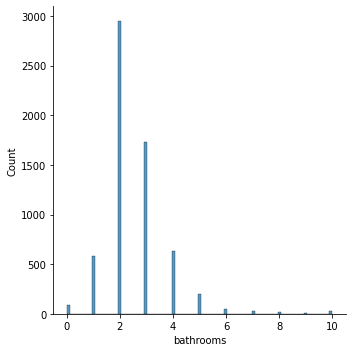

In [280]:
plots.plot_distr('bathrooms')

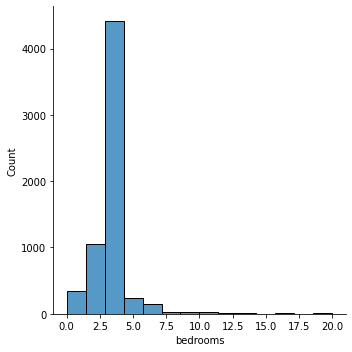

In [144]:
plots.plot_distr('bedrooms')

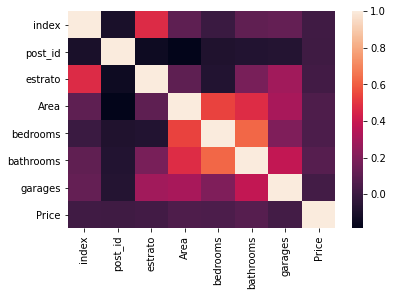

In [145]:
plots.plot_corr()

In [94]:
#plots.plot_histo()

In [35]:
columns_cat = df.data_source.select_dtypes(include=["object"]).columns
columns_cat 

Index(['post_title', 'condition', 'property_type', 'city', 'neighborhood',
       'post_link'],
      dtype='object')

In [37]:
df.drop_column('post_title')
df.drop_column('post_link')
df.drop_column('city')

In [38]:
columns_cat = df.data_source.select_dtypes(include=["object"]).columns
columns_cat 

Index(['condition', 'property_type', 'neighborhood'], dtype='object')

In [43]:
ohe = OneHotEncoder()

In [42]:
df.data_source.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 0 to 9383
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6321 non-null   int64 
 1   post_id        6321 non-null   int64 
 2   condition      6321 non-null   object
 3   estrato        6321 non-null   int64 
 4   property_type  6321 non-null   object
 5   neighborhood   6321 non-null   object
 6   Area           6321 non-null   int64 
 7   bedrooms       6321 non-null   int64 
 8   bathrooms      6321 non-null   int64 
 9   garages        6321 non-null   int64 
 10  Price          6321 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 592.6+ KB


In [45]:
encoded_data = ohe.fit_transform(df.data_source[columns_cat])

In [46]:
encoded_data

<6321x158 sparse matrix of type '<class 'numpy.float64'>'
	with 18963 stored elements in Compressed Sparse Row format>

In [47]:
cat_cols_encoded = []
for col in columns_cat :
  cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(df.data_source[col].unique())]

In [48]:
cat_cols_encoded

['c_Usado',
 'c_Inmobiliaria',
 'p_Casa',
 'p_Apartamento',
 'n_Villa Sevilla',
 'n_El Prado',
 'n_El Bosque',
 'n_Altos del Prado',
 'n_Paraíso',
 'n_Alameda del Rio',
 'n_Las Terrazas',
 'n_San Luis',
 'n_Las Américas',
 'n_Los Almendros',
 'n_Caribe Verde',
 'n_Santa María',
 'n_Ciudad Jardín',
 'n_Villa del Carmen',
 'n_Soledad 2000',
 'n_Villas San Pablo',
 'n_Villa de las Moras',
 'n_Ciudad Caribe',
 'n_Riomar',
 'n_Altos del Limón',
 'n_La Florida',
 'n_Las Granjas',
 'n_Lucero',
 'n_Los Laureles',
 'n_El Santuario',
 'n_Villa María',
 'n_Carrizal',
 'n_Los Girasoles',
 'n_Carlos Meisel',
 'n_7 de Abril.',
 'n_Ciudad Modesto',
 'n_Miramar',
 'n_Villa San Pedro I y II',
 'n_Santo Domingo de Guzmán',
 'n_Norte-Centro Histórico',
 'n_Barranquilla',
 'n_El Rubí',
 'n_José Antonio Galán',
 'n_El Limón',
 'n_Los Cocos',
 'n_Las Nieves',
 'n_Las Moras',
 'n_El Rosario',
 'n_El Campito',
 'n_Moderno',
 'n_San José',
 'n_La Sierra',
 'n_Las Colinas',
 'n_Las Estrellas',
 'n_Las Cayenas',

In [283]:
df_10 = df_data_source(df_posts,'aaaaaaaa')

In [284]:
df_10.data_source.head()

,index,post_id,post_title,bussiness_type,condition,estrato,property_type,city,neighborhood,Area,bedrooms,bathrooms,garages,post_link,Price
0,1,7172619,Usado$250.000.000 COP224m² • 3ha. • 1ba.villac...,Venta,Usado,1,Casa,barranquilla,Villa Sevilla,224,3,1,0,https://www.fincaraiz.com.co/inmueble/casa-en-...,250000000
1,2,7127871,UsadoInmobiliaria$240.000.000 COP88m² • 3ha. •...,Venta,Usado,1,Apartamento,barranquilla,El Prado,88,3,2,1,https://www.fincaraiz.com.co/inmueble/apartame...,240000000
2,3,7187797,Usado$70.000.000 COP104m² • 3ha. • 1ba.bosque ...,Venta,Usado,1,Casa,barranquilla,El Bosque,104,3,1,0,https://www.fincaraiz.com.co/inmueble/casa-en-...,70000000
3,4,7037686,UsadoInmobiliaria$1.200.000.000 COP600m² • 3ba...,Venta,Usado,1,Casa,barranquilla,Altos del Prado,600,3,5,0,https://www.fincaraiz.com.co/inmueble/casa-en-...,1200000000
4,5,7162861,UsadoInmobiliaria$350.000.000 COP4m² • 3ha. • ...,Venta,Usado,1,Casa,barranquilla,Paraíso,4,3,3,1,https://www.fincaraiz.com.co/inmueble/casa-en-...,350000000


In [460]:
encoder = oh_encoder(df.data_source)

C:\Users\ends0\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


KeyError: "['post_title'] not found in axis"

In [437]:
df_encoded = df_data_source(encoder.encode(),'pass')

C:\Users\ends0\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ends0\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
C:\Users\ends0\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
C:\Users\ends0\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [458]:
df_encoded.data_source.head()

,c_Usado,c_Inmobiliaria,e_1,e_2,e_3,e_4,e_5,p_Casa,p_Apartamento,n_Villa Sevilla,...,n_Santa Mónica,n_La Castellana,n_7 de agosto,index,post_id,Area,bedrooms,bathrooms,garages,Price
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,7172619.0,224.0,3.0,1.0,0.0,2.500000e+08
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,7127871.0,88.0,3.0,2.0,1.0,2.400000e+08
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,7187797.0,104.0,3.0,1.0,0.0,7.000000e+07
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,7037686.0,600.0,3.0,5.0,0.0,1.200000e+09
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5.0,7162861.0,4.0,3.0,3.0,1.0,3.500000e+08


In [439]:
df_encoded.data_source.to_csv('df_posts_housing_clean_encoded.csv', index=False, encoding='utf-8')

In [456]:
print("# Rows ", df_encoded.data_source.shape[0],"# Columns ", df_encoded.data_source.shape[1])
print("\n Columns \n", df_encoded.data_source.columns.tolist())
print("\n Nullls ",df_encoded.data_source.isnull().sum().values.sum())
print("\n Unique values \n", df_encoded.data_source.nunique())
print(df_encoded.data_source.shape)

# Rows  6321 # Columns  170

 Columns 
 ['c_Usado', 'c_Inmobiliaria', 'e_1', 'e_2', 'e_3', 'e_4', 'e_5', 'p_Casa', 'p_Apartamento', 'n_Villa Sevilla', 'n_El Prado', 'n_El Bosque', 'n_Altos del Prado', 'n_Paraíso', 'n_Alameda del Rio', 'n_Las Terrazas', 'n_San Luis', 'n_Las Américas', 'n_Los Almendros', 'n_Caribe Verde', 'n_Santa María', 'n_Ciudad Jardín', 'n_Villa del Carmen', 'n_Soledad 2000', 'n_Villas San Pablo', 'n_Villa de las Moras', 'n_Ciudad Caribe', 'n_Riomar', 'n_Altos del Limón', 'n_La Florida', 'n_Las Granjas', 'n_Lucero', 'n_Los Laureles', 'n_El Santuario', 'n_Villa María', 'n_Carrizal', 'n_Los Girasoles', 'n_Carlos Meisel', 'n_7 de Abril.', 'n_Ciudad Modesto', 'n_Miramar', 'n_Villa San Pedro I y II', 'n_Santo Domingo de Guzmán', 'n_Norte-Centro Histórico', 'n_Barranquilla', 'n_El Rubí', 'n_José Antonio Galán', 'n_El Limón', 'n_Los Cocos', 'n_Las Nieves', 'n_Las Moras', 'n_El Rosario', 'n_El Campito', 'n_Moderno', 'n_San José', 'n_La Sierra', 'n_Las Colinas', 'n_Las Estrel

In [457]:
df_encoded.data_source.isnull().sum().sort_values(ascending=False)

Price             2181
garages           2181
bathrooms         2181
bedrooms          2181
Area              2181
                  ... 
n_Las Cayenas        0
n_San Nicolás        0
n_El Hipódromo       0
n_San Felipe         0
n_soledad            0
Length: 170, dtype: int64

In [454]:
df_encoded.data_source['Price'].isnull().sum()

2181

In [443]:
#modeling 

In [444]:
from sklearn.linear_model import LinearRegression

In [447]:
class Predictor():
    def __init__(self,source_model,data):
        self.source_model = source_model
        self.data = data
        self.get_data()
        if(self.source_model == 'linear_regression'):
            self.linear_regression()
    def get_data(self):
        self.data.split_data(0.03)
        self.x_train = self.data.data_subset_train
        self.y_train = self.data.price_subset_train
        self.x_test = self.data.data_subset_test
        self.y_test = self.data.price_subset_test
    def linear_regression(self):
        has_nan = np.isnan(np.sum(self.data.data_subset_train))
        print(has_nan)
        has_nan2 = np.isnan(np.sum(self.data.price_subset_train))
        print(has_nan2)
        self.linear_reg = LinearRegression()
        self.linear_reg.fit(self.data.data_subset_train,self.data.price_subset_train)
        print(self.linear_reg.score(self.data.data_subset_test,self.data.price_subset_test))   

In [448]:
lr = Predictor('linear_regression',df_encoded)

True
True


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [307]:
lr.get_data
lr.get_model_lr

<bound method Predictor.get_model_lr of <__main__.Predictor object at 0x000002790E223988>>

In [316]:
lr.get_model_lr

<bound method Predictor.get_model_lr of <__main__.Predictor object at 0x000002790E223988>>

In [ ]:
df.encoded.data

In [354]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [356]:
model.fit(df_encoded.data_subset_train,df_encoded.price_subset_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [359]:
df_encoded.data_source.columns

Index(['index', 'post_id', 'Area', 'bedrooms', 'bathrooms', 'garages', 'Price',
       'c_Usado', 'c_Inmobiliaria', 'e_1',
       ...
       'n_Villa del Este', 'n_Buenavista', 'n_Granadillo', 'n_San Vicente',
       'n_Las Mercedes Sur', 'n_Puerto Colombia', 'n_Altamira',
       'n_Santa Mónica', 'n_La Castellana', 'n_7 de agosto'],
      dtype='object', length=170)